# Generative AI Architectures and Types

This notebook introduces **Generative Artificial Intelligence (GenAI)** — models that *create* new data instead of merely predicting or classifying existing data.

We'll explore the **core architectures** — Variational Autoencoders (VAEs), Generative Adversarial Networks (GANs), Autoregressive Models, and Transformers — and illustrate their logic through compact code examples.

---
### Objectives
- Understand what makes an AI model *generative*
- Explore four key generative architectures: VAE, GAN, Autoregressive, Transformer
- Distinguish unimodal vs multimodal models
- Run small, illustrative generative demos

## 🧠 1. Predictive vs Generative AI

Traditional machine learning (discriminative) models **predict or classify**. Generative models **create** new samples drawn from the same distribution as the training data.

| Type | Objective | Example |
|------|------------|----------|
| **Discriminative** | Learn decision boundaries between classes | Spam detector, classifier |
| **Generative** | Learn the underlying data distribution and generate new samples | Text-to-image, code completion, music generation |

Generative models are the creative engine of AI — they transform learned patterns into new, unseen outputs.

In [24]:
from graphviz import Digraph

g = Digraph('GenerativeFlow', format='png')
g.attr(rankdir='LR', size='7,3')
g.attr('node', shape='box', style='filled', fillcolor='lightyellow')
g.node('Data', 'Training Data')
g.node('Model', 'Generative Model')
g.node('Output', 'New Data / Content')
g.edges([('Data','Model'), ('Model','Output')])
g.attr(label='Generative Flow: Learn Patterns → Generate Novel Data')
g.render('genai_flow', view=True)

'genai_flow.png'

## 🧩 2. Key Generative Architectures

- **Variational Autoencoders (VAEs):** Compress input data into a *latent space* and reconstruct it. They learn meaningful latent representations.
- **Generative Adversarial Networks (GANs):** Two-network system — *generator* produces fake data, *discriminator* distinguishes real vs fake.
- **Autoregressive Models:** Generate sequentially; each step depends on previous outputs (e.g., language models predicting next token).
- **Transformers:** Use self-attention to model global dependencies; foundational for modern large language models like GPT and Gemini.

## 🧮 3. Variational Autoencoder (Concept Demo)

We'll simulate a VAE's idea: compressing points → latent space → reconstruction. No deep learning libs — just conceptual math.

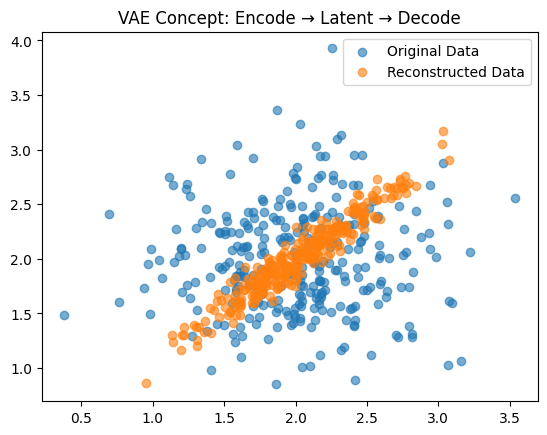

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic 2D data
X = np.random.randn(300, 2) * 0.5 + np.array([2, 2])

# Encoder: map to latent representation (mean + noise)
z_mean = X.mean(axis=1)
z = z_mean + np.random.normal(0, 0.1, size=z_mean.shape)

# Decoder: reconstruct
X_recon = np.column_stack([z + np.random.normal(0, 0.1, len(z)), z])

plt.scatter(X[:,0], X[:,1], label='Original Data', alpha=0.6)
plt.scatter(X_recon[:,0], X_recon[:,1], label='Reconstructed Data', alpha=0.6)
plt.title('VAE Concept: Encode → Latent → Decode')
plt.legend()
plt.show()

VAEs learn latent spaces that enable smooth interpolation — e.g., generating a blend between a shoe and a sandal.

## 🥊 4. GAN Concept Simulation

GANs involve two networks:
- **Generator (G):** Creates fake samples.
- **Discriminator (D):** Judges if samples are real or fake.

Both compete until G fools D completely — resulting in realistic synthetic data.

Epoch 0: Generator correction 0.048
Epoch 1: Generator correction 0.043
Epoch 2: Generator correction 0.039
Epoch 3: Generator correction 0.035
Epoch 4: Generator correction 0.031


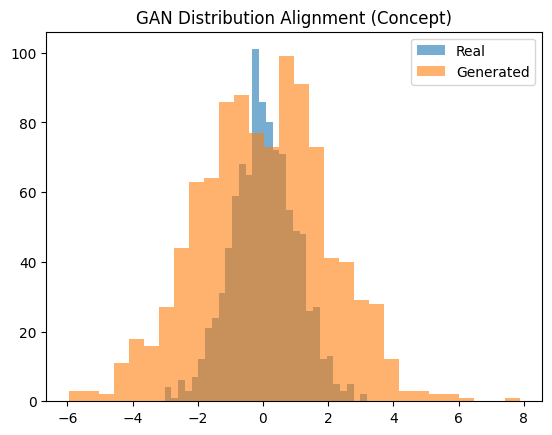

In [26]:
real_data = np.random.normal(0, 1, 1000)
gen_data = np.random.normal(0, 2, 1000)

for step in range(5):
    discriminator_score = np.mean(real_data) - np.mean(gen_data)
    gen_data += discriminator_score * 0.1  # adjust generator output
    print(f'Epoch {step}: Generator correction {discriminator_score:.3f}')

plt.hist(real_data, bins=30, alpha=0.6, label='Real')
plt.hist(gen_data, bins=30, alpha=0.6, label='Generated')
plt.legend()
plt.title('GAN Distribution Alignment (Concept)')
plt.show()

The generator gradually aligns its output distribution with the real data, demonstrating adversarial learning.

## 🧱 5. Autoregressive Text Generation (Simplified)

Autoregressive models predict the *next token* given prior context.

We'll simulate text generation using a Markov-style process.

In [27]:
import random

pairs = {
    'AI': ['creates', 'analyzes', 'transforms'],
    'creates': ['art', 'music', 'text'],
    'analyzes': ['data', 'patterns'],
    'transforms': ['ideas', 'language']
}

def generate_seq(seed='AI', length=6):
    seq = [seed]
    for _ in range(length-1):
        word = random.choice(pairs.get(seq[-1], ['AI']))
        seq.append(word)
    return ' '.join(seq)

print(generate_seq())

AI transforms ideas AI transforms language


Autoregressive generation builds output one token at a time — the logic behind GPT-style text models.

## 🧠 6. Transformer Text Generation (Mini Example)

We'll use Hugging Face’s `transformers` library to show how pre-trained models generate coherent sequences.

In [1]:
# Install PyTorch and Transformers (only needed once)
!pip install torch torchvision torchaudio transformers --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from transformers import pipeline

generator = pipeline('text-generation', model='distilgpt2')
prompt = "Artificial intelligence is"
result = generator(prompt, max_length=20, num_return_sequences=1)
print(result[0]['generated_text'])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Artificial intelligence is not a science, but a program. It‍s not a method. It‍s a way of thinking.


The research team of researchers from the University of Massachusetts-Amherst, in collaboration with the University of North Carolina at Chapel Hill, and a team of scientists from the University of Pennsylvania at Chapel Hill, are now using artificial intelligence to create artificial intelligence. Researchers have developed a new technique to create artificial intelligence that could make humans smarter than humans. The team has already built an artificial intelligence that can detect and locate a human in a room, a room or a parking lot and manipulate the way they see a person.
‍We‍re still looking at the real life AI, but we‍we‍re looking at the real world AI. We are interested in the possibilities of artificial intelligence.
‍We‍re interested in the possibility of a future where humans can be better at thinking about the world.
In this article, we‍re discussing, ‍the theory of natu

Transformers rely on *self-attention*, allowing the model to weigh relationships between all tokens in the context — enabling coherent, context-aware generation.

## 🔄 7. Unimodal vs Multimodal Models

| Model Type | Input → Output | Example | Description |
|-------------|----------------|----------|--------------|
| **Unimodal** | Text → Text | GPT-3 | Works within one data modality |
| **Multimodal** | Text → Image / Audio → Video | DALL·E 2, ImageBind | Integrates multiple sensory modalities |

Unimodal models specialize in one format. Multimodal models merge vision, audio, and language to produce rich cross-domain outputs.

## 📘 8. Summary and Insights

- **VAEs** learn compact latent representations for reconstruction and sampling.
- **GANs** create realism via adversarial feedback between generator and discriminator.
- **Autoregressive models** generate sequences step-by-step using conditional probability.
- **Transformers** enable contextual, long-range generation using attention.
- **Multimodality** extends GenAI beyond text to visuals, sound, and sensory data.

Generative architectures collectively power the creative side of AI — from synthetic art to natural conversation to intelligent agents.